### Time-Series Forecasting Of Covid-19 Cases In India (RNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('India.csv')

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active
0,30-01-2020,1,1,0,0,0,0,1
1,31-01-2020,0,1,0,0,0,0,1
2,01-02-2020,0,1,0,0,0,0,1
3,02-02-2020,1,2,0,0,0,0,2
4,03-02-2020,1,3,0,0,0,0,3


In [4]:
df1=df['Total Confirmed']

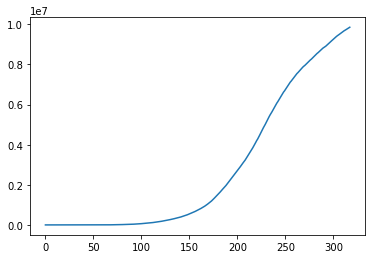

In [5]:
plt.plot(df1)

In [6]:
df1

0            1
1            1
2            1
3            2
4            3
        ...   
313    9735941
314    9767578
315    9796989
316    9826950
317    9857304
Name: Total Confirmed, Length: 318, dtype: int64

### Applying Min-Max Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.01447627e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [2.02895254e-07]
 [4.05790509e-07]
 [5.07238136e-07]
 [2.73908593e-06]
 [2.94198119e-06]
 [3.04342882e-06]
 [3.34777170e-06]
 [3.85500983e-06]
 [4.76803848e-06]
 [6.28975289e-06]
 [7.10133390e-06]
 [8.11581018e-06]
 [9.13028645e-06]
 [1.02462103e-05]
 [1.12606866e-05]
 [1.26809534e-05]
 [1.47099059e-05]
 [1.72460966e-05]
 [1.99851826e-05]
 [2.58691449e-05]
 [3.37820599e-05]
 [4.07819461e-05]
 [5.03180231e-05]
 [5.78251475e-05]
 [6.654964

### Splitting Data into Training And Test

In [9]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(222, 96)

In [11]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.01447627e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [2.02895254e-07],
       [4.05790509e-07],
       [5.07238136e-07],
       [2.73908593e-06],
       [2.94198119e-06],
       [3.04342882e-06],
       [3.34777170e-06],
       [3.85500983e-06],
       [4.76803848e-06],


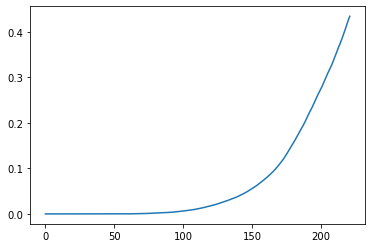

In [12]:
plt.plot(train_data)

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 45
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(176, 45)
(176,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(50, 45)
(50,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization


In [19]:
model=Sequential()
model.add(SimpleRNN(128,input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [23]:
import tensorflow
filepath="weights.best.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch')

In [24]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1000,batch_size=16,callbacks=checkpoint,verbose=1)

Epoch 1/1000
11/11 [==============================] - 1s 53ms/step - loss: 0.0097 - val_loss: 0.0786
Epoch 2/1000
11/11 [==============================] - 0s 25ms/step - loss: 5.7281e-04 - val_loss: 0.0597
Epoch 3/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.3138e-04 - val_loss: 0.0511
Epoch 4/1000
11/11 [==============================] - 0s 8ms/step - loss: 5.5996e-05 - val_loss: 0.0658
Epoch 5/1000
11/11 [==============================] - 0s 8ms/step - loss: 2.2063e-05 - val_loss: 0.0646
Epoch 6/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.5121e-05 - val_loss: 0.0622
Epoch 7/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.1143e-05 - val_loss: 0.0657
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 9.8969e-06 - val_loss: 0.0670
Epoch 9/1000
11/11 [==============================] - 0s 7ms/step - loss: 8.3848e-06 - val_loss: 0.0685
Epoch 10/1000
11/11 [==============================] - 0s 7ms/ste

Epoch 79/1000
11/11 [==============================] - 0s 8ms/step - loss: 2.2782e-06 - val_loss: 0.0222
Epoch 80/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.9743e-06 - val_loss: 0.0215
Epoch 81/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.1512e-06 - val_loss: 0.0218
Epoch 82/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.7538e-06 - val_loss: 0.0212
Epoch 83/1000
11/11 [==============================] - 0s 9ms/step - loss: 3.9120e-06 - val_loss: 0.0231
Epoch 84/1000
11/11 [==============================] - 0s 12ms/step - loss: 2.5462e-06 - val_loss: 0.0186
Epoch 85/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.8719e-06 - val_loss: 0.0203
Epoch 86/1000
11/11 [==============================] - 0s 8ms/step - loss: 4.3938e-06 - val_loss: 0.0187
Epoch 87/1000
11/11 [==============================] - 0s 13ms/step - loss: 7.4867e-06 - val_loss: 0.0147
Epoch 88/1000
11/11 [==============================] 

11/11 [==============================] - 0s 8ms/step - loss: 1.2619e-06 - val_loss: 6.7922e-04
Epoch 233/1000
11/11 [==============================] - 0s 7ms/step - loss: 9.4819e-07 - val_loss: 7.4628e-04
Epoch 234/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.2542e-06 - val_loss: 6.1889e-04
Epoch 235/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.8281e-07 - val_loss: 5.6624e-04
Epoch 236/1000
11/11 [==============================] - 0s 8ms/step - loss: 5.0305e-07 - val_loss: 3.8711e-04
Epoch 237/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.7376e-07 - val_loss: 6.0755e-04
Epoch 238/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.7225e-07 - val_loss: 5.1643e-04
Epoch 239/1000
11/11 [==============================] - 0s 8ms/step - loss: 4.1512e-07 - val_loss: 5.2177e-04
Epoch 240/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.9455e-07 - val_loss: 5.4509e-04
Epoch 241/1000
11/11 [===

11/11 [==============================] - 0s 8ms/step - loss: 3.7782e-07 - val_loss: 1.1182e-05
Epoch 381/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.3373e-07 - val_loss: 9.3218e-06
Epoch 382/1000
11/11 [==============================] - 0s 7ms/step - loss: 3.0349e-07 - val_loss: 6.6443e-06
Epoch 383/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.2784e-07 - val_loss: 1.8964e-05
Epoch 384/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.3316e-06 - val_loss: 1.0057e-04
Epoch 385/1000
11/11 [==============================] - ETA: 0s - loss: 2.1458e-0 - 0s 8ms/step - loss: 2.4707e-06 - val_loss: 5.2122e-06
Epoch 386/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.3998e-06 - val_loss: 1.5603e-05
Epoch 387/1000
11/11 [==============================] - 0s 12ms/step - loss: 4.1863e-07 - val_loss: 4.1950e-06
Epoch 388/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.0188e-07 - val_loss: 7.4298e

11/11 [==============================] - 0s 7ms/step - loss: 4.5246e-07 - val_loss: 2.8763e-05
Epoch 455/1000
11/11 [==============================] - 0s 7ms/step - loss: 8.9543e-07 - val_loss: 2.8693e-06
Epoch 456/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.1481e-07 - val_loss: 3.1906e-06
Epoch 457/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.4856e-07 - val_loss: 4.1244e-06
Epoch 458/1000
11/11 [==============================] - 0s 6ms/step - loss: 2.7471e-07 - val_loss: 2.3585e-06
Epoch 459/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.0915e-07 - val_loss: 1.3732e-05
Epoch 460/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.7341e-07 - val_loss: 2.0004e-05
Epoch 461/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.4891e-06 - val_loss: 4.2257e-06
Epoch 462/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.8277e-06 - val_loss: 1.1014e-04
Epoch 463/1000
11/11 [===

11/11 [==============================] - 1s 52ms/step - loss: 9.7983e-07 - val_loss: 5.3680e-07
Epoch 603/1000
11/11 [==============================] - 0s 8ms/step - loss: 8.3533e-07 - val_loss: 7.4151e-06
Epoch 604/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.0787e-06 - val_loss: 1.0451e-04
Epoch 605/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.4960e-06 - val_loss: 4.8307e-05
Epoch 606/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.4576e-07 - val_loss: 8.9660e-06
Epoch 607/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.5914e-07 - val_loss: 2.7691e-05
Epoch 608/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.9524e-06 - val_loss: 2.5669e-04
Epoch 609/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.0384e-05 - val_loss: 4.9228e-05
Epoch 610/1000
11/11 [==============================] - 0s 9ms/step - loss: 1.0715e-05 - val_loss: 0.0019
Epoch 611/1000
11/11 [======

11/11 [==============================] - 0s 7ms/step - loss: 3.1484e-07 - val_loss: 7.2938e-07
Epoch 751/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.0597e-06 - val_loss: 8.3212e-05
Epoch 752/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.1430e-06 - val_loss: 2.3740e-05
Epoch 753/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.4545e-06 - val_loss: 1.6037e-04
Epoch 754/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.8460e-06 - val_loss: 1.9541e-04
Epoch 755/1000
11/11 [==============================] - 0s 7ms/step - loss: 2.6443e-06 - val_loss: 3.7407e-05
Epoch 756/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.5349e-06 - val_loss: 2.2444e-05
Epoch 757/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.3466e-06 - val_loss: 4.1130e-06
Epoch 758/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.4983e-07 - val_loss: 1.4481e-05
Epoch 759/1000
11/11 [===

11/11 [==============================] - 0s 7ms/step - loss: 5.5057e-07 - val_loss: 3.2072e-05
Epoch 899/1000
11/11 [==============================] - 0s 7ms/step - loss: 8.1154e-07 - val_loss: 1.6109e-05
Epoch 900/1000
11/11 [==============================] - 0s 7ms/step - loss: 3.3328e-07 - val_loss: 2.4268e-05
Epoch 901/1000
11/11 [==============================] - ETA: 0s - loss: 5.5661e-0 - 0s 7ms/step - loss: 5.5373e-07 - val_loss: 1.8226e-05
Epoch 902/1000
11/11 [==============================] - 0s 7ms/step - loss: 6.0258e-07 - val_loss: 3.9172e-06
Epoch 903/1000
11/11 [==============================] - 0s 7ms/step - loss: 3.5093e-07 - val_loss: 1.7970e-05
Epoch 904/1000
11/11 [==============================] - 0s 8ms/step - loss: 3.9932e-07 - val_loss: 1.2463e-04
Epoch 905/1000
11/11 [==============================] - 0s 7ms/step - loss: 6.8300e-07 - val_loss: 3.8427e-05
Epoch 906/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.3759e-07 - val_loss: 3.0494e-

11/11 [==============================] - 0s 7ms/step - loss: 1.0577e-06 - val_loss: 3.1126e-05
Epoch 973/1000
11/11 [==============================] - 0s 7ms/step - loss: 7.7379e-07 - val_loss: 6.1290e-07
Epoch 974/1000
11/11 [==============================] - 0s 7ms/step - loss: 4.9836e-07 - val_loss: 4.9799e-07
Epoch 975/1000
11/11 [==============================] - 0s 7ms/step - loss: 3.9608e-07 - val_loss: 2.0469e-06
Epoch 976/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.0583e-07 - val_loss: 2.0792e-06
Epoch 977/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.2781e-06 - val_loss: 3.3543e-06
Epoch 978/1000
11/11 [==============================] - 0s 8ms/step - loss: 8.2831e-07 - val_loss: 3.3667e-05
Epoch 979/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.4208e-06 - val_loss: 1.0842e-05
Epoch 980/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.0263e-07 - val_loss: 8.1312e-07
Epoch 981/1000
11/11 [===

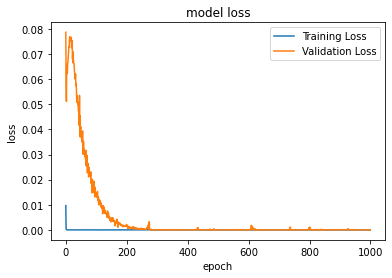

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [65]:
model.load_weights("weights.best.hdf5")

In [66]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [67]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0006515448520646549

Validation Set RMSE ERROR

In [68]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.0006376400900252459

Validation Set Mean Absolute Error

In [69]:
mean_absolute_error(ytest,test_predict)

0.00046175831568293633

Training MEA

In [70]:
mean_absolute_error(y_train,train_predict)

0.0006124508375624948

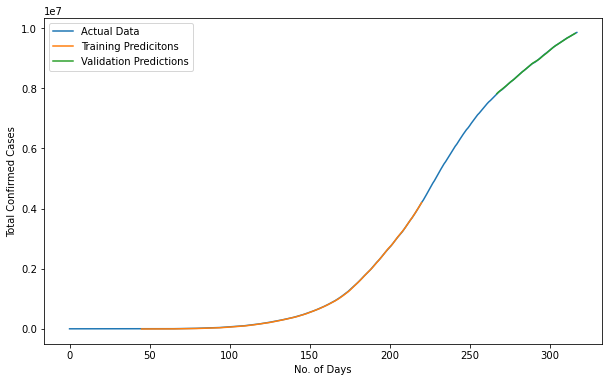

In [71]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('Total Confirmed Cases')
plt.xlabel('No. of Days')
plt.legend(['Actual Data','Training Predicitons', 'Validation Predictions'])
plt.show()

In [72]:
len(test_data)

96

In [73]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape


(1, 45)

In [74]:
x_input

array([[0.82050547, 0.82538682, 0.83017799, 0.83483728, 0.8386509 ,
        0.84332023, 0.84843978, 0.85327153, 0.85834563, 0.86302775,
        0.86776606, 0.8715317 , 0.87606884, 0.88096724, 0.88549028,
        0.89001687, 0.89424643, 0.89735894, 0.90026126, 0.90417186,
        0.90877413, 0.91345949, 0.91815479, 0.92275047, 0.92725515,
        0.93105345, 0.935542  , 0.94007661, 0.94445651, 0.94865167,
        0.95289371, 0.95685382, 0.96001685, 0.96371705, 0.96731905,
        0.9710294 , 0.97475364, 0.97840677, 0.9817726 , 0.98443327,
        0.98768801, 0.99089751, 0.99388119, 0.99692066, 1.        ]])

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
temp_input

[0.8205054668604587,
 0.825386822338727,
 0.8301779908764091,
 0.8348372774987235,
 0.8386508967006493,
 0.8433202266380571,
 0.8484397811450048,
 0.8532715287335694,
 0.858345634703529,
 0.8630277470419647,
 0.8677660613658726,
 0.8715316958401299,
 0.8760688395192884,
 0.8809672381989272,
 0.8854902806579041,
 0.8900168737838332,
 0.8942464282573033,
 0.8973589429076088,
 0.9002612580743434,
 0.9041718612078781,
 0.9087741342637028,
 0.9134594929262091,
 0.9181547934561817,
 0.922750472416238,
 0.9272551528546906,
 0.9310534534649082,
 0.935542003730635,
 0.9400766112191133,
 0.9444565110761026,
 0.94865167480395,
 0.9528937073355663,
 0.9568538169111774,
 0.9600168524798315,
 0.9637170532345409,
 0.9673190526861151,
 0.9710293982035452,
 0.9747536420459024,
 0.9784067711015884,
 0.9817726004770271,
 0.9844332673957572,
 0.9876880116194054,
 0.9908975102013198,
 0.9938811863650737,
 0.9969206587237909,
 1.0]

In [77]:
from numpy import array
nextpredicted=60#predicting for next 60 days
lst_output=[]
n_steps=time_step
i=0
while(i<nextpredicted):
    
    if(len(temp_input)>n_steps):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0027595]
46
1 day input [0.82538682 0.83017799 0.83483728 0.8386509  0.84332023 0.84843978
 0.85327153 0.85834563 0.86302775 0.86776606 0.8715317  0.87606884
 0.88096724 0.88549028 0.89001687 0.89424643 0.89735894 0.90026126
 0.90417186 0.90877413 0.91345949 0.91815479 0.92275047 0.92725515
 0.93105345 0.935542   0.94007661 0.94445651 0.94865167 0.95289371
 0.95685382 0.96001685 0.96371705 0.96731905 0.9710294  0.97475364
 0.97840677 0.9817726  0.98443327 0.98768801 0.99089751 0.99388119
 0.99692066 1.         1.00275946]
1 day output [[1.0053633]]
2 day input [0.83017799 0.83483728 0.8386509  0.84332023 0.84843978 0.85327153
 0.85834563 0.86302775 0.86776606 0.8715317  0.87606884 0.88096724
 0.88549028 0.89001687 0.89424643 0.89735894 0.90026126 0.90417186
 0.90877413 0.91345949 0.91815479 0.92275047 0.92725515 0.93105345
 0.935542   0.94007661 0.94445651 0.94865167 0.95289371 0.95685382
 0.96001685 0.96371705 0.96731905 0.9710294  0.97475364 0.97840677
 0.9817726  0.98443327 0.987

19 day output [[1.0531365]]
20 day input [0.90877413 0.91345949 0.91815479 0.92275047 0.92725515 0.93105345
 0.935542   0.94007661 0.94445651 0.94865167 0.95289371 0.95685382
 0.96001685 0.96371705 0.96731905 0.9710294  0.97475364 0.97840677
 0.9817726  0.98443327 0.98768801 0.99089751 0.99388119 0.99692066
 1.         1.00275946 1.00536335 1.00821137 1.0111059  1.01386142
 1.0167197  1.01945829 1.02199125 1.0244931  1.02713406 1.02981842
 1.03246665 1.0351665  1.0377624  1.04019892 1.04268825 1.04528856
 1.04790866 1.05052602 1.05313647]
20 day output [[1.0556507]]
21 day input [0.91345949 0.91815479 0.92275047 0.92725515 0.93105345 0.935542
 0.94007661 0.94445651 0.94865167 0.95289371 0.95685382 0.96001685
 0.96371705 0.96731905 0.9710294  0.97475364 0.97840677 0.9817726
 0.98443327 0.98768801 0.99089751 0.99388119 0.99692066 1.
 1.00275946 1.00536335 1.00821137 1.0111059  1.01386142 1.0167197
 1.01945829 1.02199125 1.0244931  1.02713406 1.02981842 1.03246665
 1.0351665  1.0377624  1

37 day output [[1.0943162]]
38 day input [0.9817726  0.98443327 0.98768801 0.99089751 0.99388119 0.99692066
 1.         1.00275946 1.00536335 1.00821137 1.0111059  1.01386142
 1.0167197  1.01945829 1.02199125 1.0244931  1.02713406 1.02981842
 1.03246665 1.0351665  1.0377624  1.04019892 1.04268825 1.04528856
 1.04790866 1.05052602 1.05313647 1.05565071 1.058025   1.06043899
 1.0628854  1.0653621  1.06782007 1.07026792 1.07259619 1.07481372
 1.07704246 1.07930124 1.08157659 1.08383799 1.08607244 1.08819091
 1.09021902 1.09226131 1.09431624]
38 day output [[1.0963858]]
39 day input [0.98443327 0.98768801 0.99089751 0.99388119 0.99692066 1.
 1.00275946 1.00536335 1.00821137 1.0111059  1.01386142 1.0167197
 1.01945829 1.02199125 1.0244931  1.02713406 1.02981842 1.03246665
 1.0351665  1.0377624  1.04019892 1.04268825 1.04528856 1.04790866
 1.05052602 1.05313647 1.05565071 1.058025   1.06043899 1.0628854
 1.0653621  1.06782007 1.07026792 1.07259619 1.07481372 1.07704246
 1.07930124 1.08157659

54 day output [[1.1256295]]
55 day input [1.02981842 1.03246665 1.0351665  1.0377624  1.04019892 1.04268825
 1.04528856 1.04790866 1.05052602 1.05313647 1.05565071 1.058025
 1.06043899 1.0628854  1.0653621  1.06782007 1.07026792 1.07259619
 1.07481372 1.07704246 1.07930124 1.08157659 1.08383799 1.08607244
 1.08819091 1.09021902 1.09226131 1.09431624 1.09638584 1.09843051
 1.10045493 1.10238659 1.104249   1.10611439 1.10799491 1.10987329
 1.11174572 1.11358309 1.11535168 1.1170634  1.11878145 1.1205039
 1.12222934 1.12394643 1.12562954]
55 day output [[1.127252]]
56 day input [1.03246665 1.0351665  1.0377624  1.04019892 1.04268825 1.04528856
 1.04790866 1.05052602 1.05313647 1.05565071 1.058025   1.06043899
 1.0628854  1.0653621  1.06782007 1.07026792 1.07259619 1.07481372
 1.07704246 1.07930124 1.08157659 1.08383799 1.08607244 1.08819091
 1.09021902 1.09226131 1.09431624 1.09638584 1.09843051 1.10045493
 1.10238659 1.104249   1.10611439 1.10799491 1.10987329 1.11174572
 1.11358309 1.11

In [78]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+nextpredicted+1)

In [79]:
import matplotlib.pyplot as plt

In [80]:
len(df1)

318

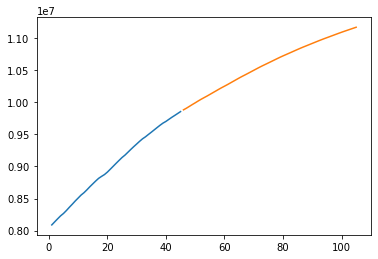

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [82]:
df3=df1.tolist()
df3.extend(lst_output)

In [83]:
df3=scaler.inverse_transform(df3).tolist()

In [84]:
df3=pd.DataFrame(df3,columns=['Total Cases'])

In [85]:
df3['Date'] = pd.date_range(start='30/1/2020', periods=len(df3), freq='D')


In [86]:
df3['Total Cases']=df3['Total Cases'].astype('int64')

### Plotting Predicted and The Data We Have
 Orange showing the predictions for Next 180 days and Blue Showing the Data We Have Got till 12/12/2020

In [87]:
from matplotlib import dates as mpl_dates
date_format = mpl_dates.DateFormatter('%d-%m-%Y')

In [88]:
df3['st']=df3['Date'].dt.strftime("%d/%m/%Y")

In [89]:
b=df3['st'].tolist()

In [90]:
b

['30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/2020',
 '20/03/2020',
 '21/03/2020',
 '22/03/2020',
 '23/03/2020',
 '24/03/2020',
 '25/03/2020',
 '26/03/2020',
 '27/03/2020',
 '28/03/2020',
 '29/03/2020',
 '30/03/2020',
 '31/03/2020',
 '01/04/2020',
 '02/04/2020',
 '03/04/2020',
 '04/04/2020',
 '05/04/20

In [ ]:
plt.figure(figsize=(12,8))
plt.plot_date(x=df3['Date'][:df.shape[0]],y=df3['Total Cases'][:df.shape[0]])
plt.plot_date(x=df3['Date'][df.shape[0]:],y=df3['Total Cases'][df.shape[0]:])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=20)
plt.ylabel('Total Confirmed Cases')
plt.xlabel('Dates')
plt.legend(['Actual Data', 'Predictions'])

In [96]:
df3.tail()

,Total Cases,Date,st
373,11111665,2021-02-06,06/02/2021
374,11127275,2021-02-07,07/02/2021
375,11142862,2021-02-08,08/02/2021
376,11158484,2021-02-09,09/02/2021
377,11174069,2021-02-10,10/02/2021


ValueError: x and y must have same first dimension, but have shapes (498,) and (318,)

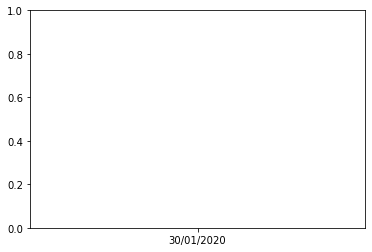

In [145]:
plt.plot(b,df3['Total Cases'][:df.shape[0]])
plt.plot(b,df3['Total Cases'][df.shape[0]:])


In [103]:
import plotly.express as px

In [45]:
df3[df3['Date']=='25-01-2021']['Total Cases']

361    10903305
Name: Total Cases, dtype: int64

In [78]:
df3.shape

(498, 2)